In [1]:
import quandl as qn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.callbacks import TensorBoard
qn.ApiConfig.api_key = "HQV7bdPFvAn1QUxxkN5c"
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

Using TensorFlow backend.


In [42]:
data_google=qn.get("EOD/GOOGL", start_date="2012-05-20", end_date="2017-01-01",collapse="daily", transformation='rdiff')
data_fb=qn.get("EOD/FB",start_date="2012-05-20",end_date="2017-01-01",collapse="daily", transformation='rdiff')
data_apple=qn.get("EOD/AAPL",start_date="2012-05-20",end_date="2017-01-01",collapse="daily", transformation='rdiff')
data_mic=qn.get("EOD/MSFT",start_date="2012-05-20",end_date="2017-01-01",collapse="daily", transformation='rdiff')
data_amz=qn.get("EOD/AMZN",start_date="2012-05-20",end_date="2017-01-01",collapse="daily", transformation='rdiff')

In [43]:
df_google = pd.DataFrame(data_google['Close'])#, index=pd.date_range('9/30/2009', periods=1000))
df_fb = pd.DataFrame(data_fb['Close'])
df_apple = pd.DataFrame(data_apple['Close'])
df_mic = pd.DataFrame(data_mic['Close'])
df_amz = pd.DataFrame(data_amz['Close'])

In [44]:
print len(df_google)
print len(df_fb)
print len(df_apple)
print len(df_mic)
print len(df_amz)

1161
1161
1161
1161
1161


In [45]:
scaler = MinMaxScaler()
serries_scaled=[]
s1="df_google"
s2="df_fb"
s3="df_apple"
s4="df_mic"
s5="df_amz"
df_sGoogle = pd.DataFrame(scaler.fit_transform(df_google), columns=df_google.columns)
df_sFb = pd.DataFrame(scaler.fit_transform(df_fb), columns=df_fb.columns)
df_sApple = pd.DataFrame(scaler.fit_transform(df_apple), columns=df_apple.columns)
df_sMic = pd.DataFrame(scaler.fit_transform(df_mic), columns=df_mic.columns)
df_sAmz = pd.DataFrame(scaler.fit_transform(df_amz), columns=df_amz.columns)

In [46]:
import numpy as np
#combined=np.column_stack((df_sGoogle,df_sFb,df_sApple, df_sAmz))
combined=np.column_stack((df_google,df_fb,df_apple, df_amz))

In [47]:
combined=combined[:].ravel()

In [7]:
combined.shape[:]
matrices=combined[:4640].reshape(58,20,4,1)
matrices.shape[:]
#matrices[][][]
df2 = pd.DataFrame(matrices[0][:][:][:].ravel())
#print matrices[1,:,:]
#print matrices[0,:,:]
#print combined[:720]
#df = pd.DataFrame(data['Open'], index=pd.date_range('9/30/2009', periods=3000))

In [77]:
# Sliding over time series # 
scan=20
stride=1
#print df_google['Close'].shape[:]
#print df_google['Close'][:20]
Google=sliding_window(df_google['Close'],(scan),(1))
#Google=sliding_window(df_google['Close'],(10),(1))
#g = pd.DataFrame(Google[0]) 
#g.plot()
#print Google[0]
#plt.show()

In [ ]:
# this is the size of our encoded representations
encoding_dim = 5  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(scan,))
#print input_img
# "encoded" is the encoded representation of the input
encoded = Dense(5, activation='relu' )(input_img)
print encoded.shape[1:]
#encoded = Dense(128, activation='relu' )(encoded)
#encoded = Dense(64, activation='relu' )(encoded)
#encoded = Dense(32, activation='relu' )(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(10, activation='relu')(encoded)
#decoded2 = Dense(128, activation='relu')(decoded1)
#decoded = Dense(784, activation='sigmoid')(decoded2)

In [25]:
## Start compiling CNN autoencoders 
autoencoder = Model(input_img, decoded)
encoder=Model(input_img, encoded)
L=len(autoencoder.layers)

In [26]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [29]:
autoencoder.fit(matrices, matrices,
                epochs=200,
                batch_size=20,
                shuffle=False,
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/200
58/58 [==============================] - 0s - loss: 0.5275     
Epoch 2/200
58/58 [==============================] - 0s - loss: 0.5274     
Epoch 3/200
58/58 [==============================] - 0s - loss: 0.5274     
Epoch 4/200
58/58 [==============================] - 0s - loss: 0.5273     
Epoch 5/200
58/58 [==============================] - 0s - loss: 0.5273     
Epoch 6/200
58/58 [==============================] - 0s - loss: 0.5272     
Epoch 7/200
58/58 [==============================] - 0s - loss: 0.5272     
Epoch 8/200
58/58 [==============================] - 0s - loss: 0.5271     
Epoch 9/200
58/58 [==============================] - 0s - loss: 0.5271     
Epoch 10/200
58/58 [==============================] - 0s - loss: 0.5270     
Epoch 11/200
58/58 [==============================] - 0s - loss: 0.5270     
Epoch 12/200
58/58 [==============================] - 0s - loss: 0.5269     
Epoch 13/200
58/58 [==============================] - 0s - loss: 0.5269     
Epoch 14

In [124]:
dec_imgs=autoencoder.predict(matrices)
enc_imgs=encoder.predict(matrices)

/Users/mezzatab/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in divide


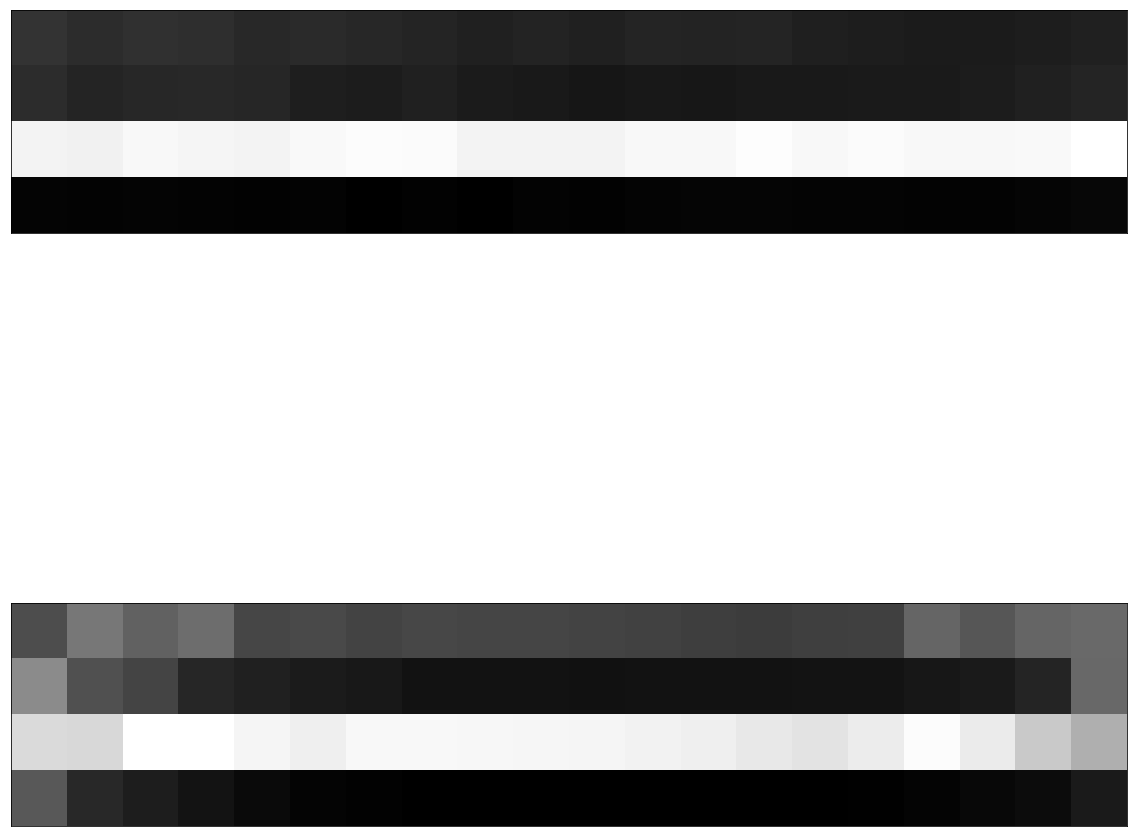

In [125]:
plt.figure(figsize=(20, 20))
n=1
for i in range(n):
    ax=plt.subplot(2, n, i+1)
#    print matrices[i].shape[:]
    xtest=matrices[i].reshape(20,4).T
    plt.imshow(xtest)
    plt.gray()
    ax.get_xaxis().set_visible(False)    
    ax.get_yaxis().set_visible(False)        
    ax1=plt.subplot(2, n, n+i+1)    
    img=dec_imgs[i].reshape(20,4).T
    plt.imshow(img)    
    plt.gray()
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)    
    diff=(xtest-img)/(xtest)
    #plt.imshow(diff)    
#    plt.gray()
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)    
    
plt.show()

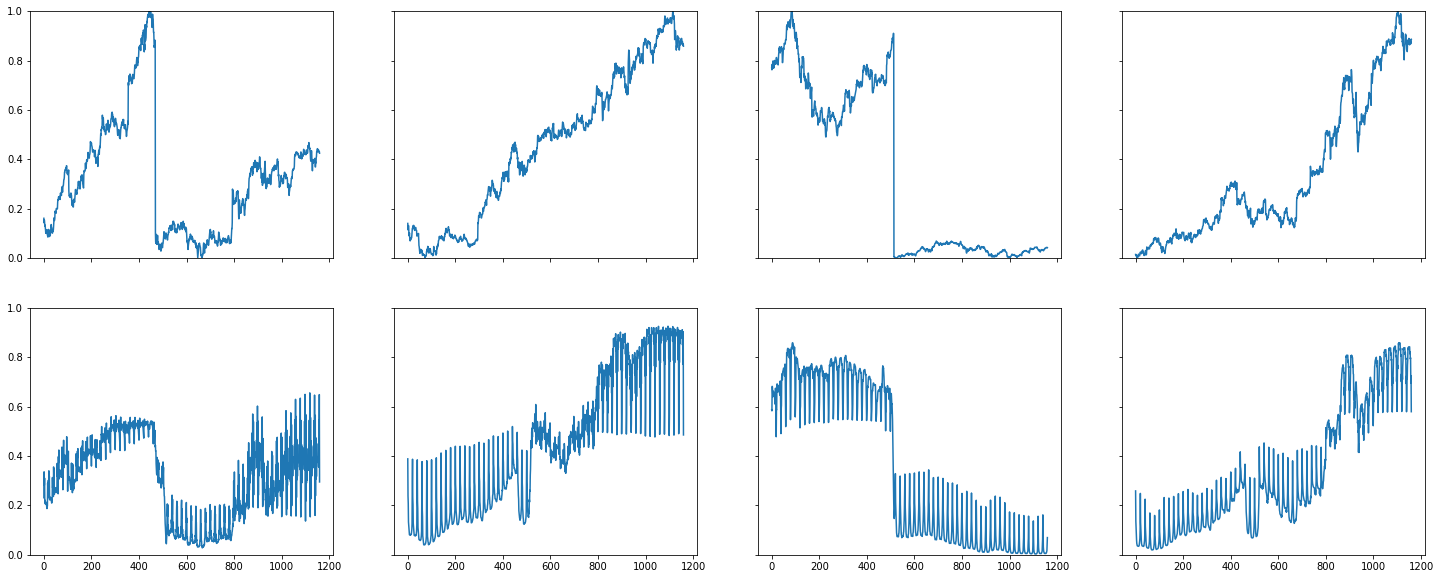

In [131]:
def reconTSeries(Imgs, nImgs, nDays, cIndex):
    l1=[]
    for i in range(0,nImgs):
        for j in range(0,nDays):
            l1.append(Imgs[i][j][cIndex][0])
    return l1

def checkTSeries(Imgs, nImgs, nDays, cIndex):
    l1=[]
    for i in range(0,nImgs):
        for j in range(0,nDays):
            if Imgs[i][j][cIndex][0] > 0.5:
                l1.append(Imgs[i][j][cIndex][:])
    return l1


'''
oTime=reconTSeries(matrices, 58, 20, 1)
timeSeries=pd.DataFrame(oTime)
timeSeries.plot()


oTime=reconTSeries(dec_imgs, 58, 20, 1)
timeSeries=pd.DataFrame(oTime)
timeSeries.plot()

'''
'''
plt.clf()
oTime=reconTSeries(matrices, 58, 20, 0)
timeSeries=pd.DataFrame(oTime)
timeSeries.plot()

oTime=reconTSeries(dec_imgs, 58, 20, 0)
#print oTime 
#print checkTSeries(dec_imgs, 58, 20, 0)
timeSeries=pd.DataFrame(oTime)
timeSeries.plot()

plt.show()

plt.clf()

plt.clf()
oTime=reconTSeries(matrices, 58, 20, 1)
timeSeries=pd.DataFrame(oTime)
timeSeries.plot()

oTime=reconTSeries(dec_imgs, 58, 20, 1)
timeSeries=pd.DataFrame(oTime)
timeSeries.plot()

plt.show()



plt.clf()
oTime=reconTSeries(matrices, 58, 20, 2)
timeSeries=pd.DataFrame(oTime)
timeSeries.plot()

oTime=reconTSeries(dec_imgs, 58, 20, 2)
timeSeries=pd.DataFrame(oTime)
timeSeries.plot()

plt.show()


plt.clf()
oTime=reconTSeries(matrices, 58, 20, 3)
timeSeries=pd.DataFrame(oTime)
timeSeries.plot()

oTime=reconTSeries(dec_imgs, 58, 20, 3)
timeSeries=pd.DataFrame(oTime)
timeSeries.plot()

plt.show()
'''

plt.clf()


oTime=[]
#plt.figure(figsize=(10, 10))
f, axes = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(25,10))
#f.set_figheight(20)
#f.set_figwidth(20)
axes[0,0].set_ylim(0,1)
axes[0,1].set_ylim(0,1)
axes[0,2].set_ylim(0,1)
axes[0,3].set_ylim(0,1)
axes[1,0].set_ylim(0,1)
axes[1,1].set_ylim(0,1)
axes[1,2].set_ylim(0,1)
axes[1,3].set_ylim(0,1)

oTime=reconTSeries(matrices, 58, 20, 0)
timeSeries=pd.DataFrame(oTime)
axes[0,0].plot(timeSeries)

oTime=reconTSeries(matrices, 58, 20, 1)
timeSeries=pd.DataFrame(oTime)
axes[0,1].plot(timeSeries)

oTime=reconTSeries(matrices, 58, 20, 2)
timeSeries=pd.DataFrame(oTime)
axes[0,2].plot(timeSeries)

oTime=reconTSeries(matrices, 58, 20, 3)
timeSeries=pd.DataFrame(oTime)
axes[0,3].plot(timeSeries)

oTime=reconTSeries(dec_imgs, 58, 20, 0)
timeSeries=pd.DataFrame(oTime)
axes[1,0].plot(timeSeries)

oTime=reconTSeries(dec_imgs, 58, 20, 1)
timeSeries=pd.DataFrame(oTime)
axes[1,1].plot(timeSeries)

oTime=reconTSeries(dec_imgs, 58, 20, 2)
timeSeries=pd.DataFrame(oTime)
axes[1,2].plot(timeSeries)

oTime=reconTSeries(dec_imgs, 58, 20, 3)
timeSeries=pd.DataFrame(oTime)
axes[1,3].plot(timeSeries)


'''
n=1

for i in range(n):
    ax=plt.subplot(1, n, i+1)
    oTime=reconTSeries(matrices, 58, 20, i)
    timeSeries=pd.DataFrame(oTime)
    timeSeries.plot()
#    plt.imshow(xtest)
#    plt.gray()
    ax.get_xaxis().set_visible(False)    
    ax.get_yaxis().set_visible(False)        
    ax1=plt.subplot(2, n, n+i)    
    oTime=reconTSeries(dec_imgs, 58, 20, i)
    timeSeries=pd.DataFrame(oTime)
    timeSeries.plot()
#    plt.gray()
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)    
    diff=(xtest-img)/(xtest)
    #plt.imshow(diff)    
#    plt.gray()
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)    


# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')
'''
plt.show()